In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
import statsmodels.formula.api as smf
import statsmodels.tools.tools as sm_tools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

pip install seaborn

In [102]:
df= pd.read_csv('/Users/rajdipingale/Downloads/mcdonalds.csv')

In [10]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [12]:
df.shape

(1453, 15)

In [14]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [150]:
df2= df.iloc[:, :11]

In [151]:
df2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [152]:
label_encoder = LabelEncoder()

for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col]= label_encoder.fit_transform(df2[col])
    

In [153]:
df2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [39]:
df2.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [40]:
pca=PCA()
pca.fit(df2)

PCA()

In [41]:
pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [42]:
std_deviation = np.sqrt(pca.explained_variance_)
prop_variance = pca.explained_variance_ratio_
cumulative_prop = np.cumsum(prop_variance)

print("Standard Deviation (Square Root of Variance):")
for i, std in enumerate(std_deviation):
    print(f"PC{i+1}: {std:.4f}")

print("\nProportion of Variance Explained:")
for i, prop in enumerate(prop_variance):
    print(f"PC{i+1}: {prop:.4f}")

print("\nCumulative Proportion of Variance Explained:")
for i, cum_prop in enumerate(cumulative_prop):
    print(f"PC{i+1}: {cum_prop:.4f}")

Standard Deviation (Square Root of Variance):
PC1: 0.7570
PC2: 0.6075
PC3: 0.5046
PC4: 0.3988
PC5: 0.3374
PC6: 0.3103
PC7: 0.2897
PC8: 0.2751
PC9: 0.2653
PC10: 0.2488
PC11: 0.2369

Proportion of Variance Explained:
PC1: 0.2994
PC2: 0.1928
PC3: 0.1330
PC4: 0.0831
PC5: 0.0595
PC6: 0.0503
PC7: 0.0438
PC8: 0.0395
PC9: 0.0368
PC10: 0.0324
PC11: 0.0293

Cumulative Proportion of Variance Explained:
PC1: 0.2994
PC2: 0.4922
PC3: 0.6253
PC4: 0.7084
PC5: 0.7679
PC6: 0.8182
PC7: 0.8620
PC8: 0.9016
PC9: 0.9383
PC10: 0.9707
PC11: 1.0000


In [43]:
rotation_matrix = pca.components_
print("Rotation (n x k) = (11 x 11):")
print(rotation_matrix)


Rotation (n x k) = (11 x 11):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.0130411

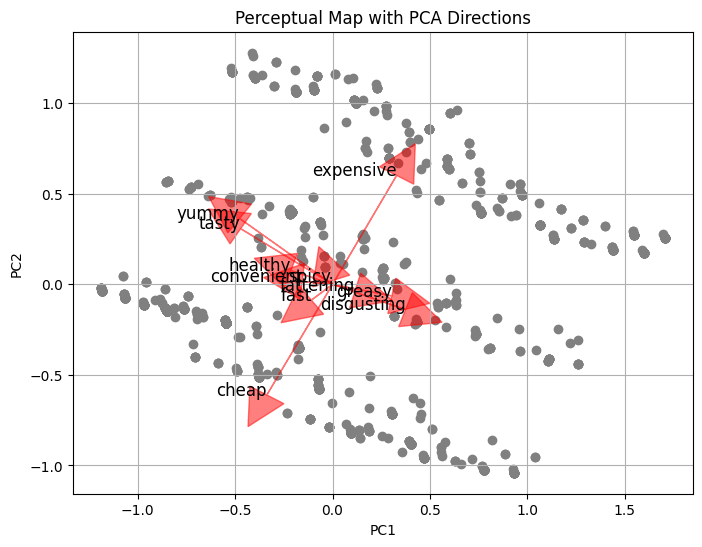

In [49]:
pca = PCA(n_components=2)
pca.fit(df2)

pca_scores = pca.transform(df2)
# Create figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Scatter plot of PCA scores
ax.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey')

# Plot arrows representing variable directions
feature_vectors = pca.components_.T
for i, v in enumerate(feature_vectors):
    ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2, fc='r', ec='r', alpha=0.5)
    ax.text(v[0], v[1], df.columns[i], fontsize=12, ha='right')

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Perceptual Map with PCA Directions')

# Grid and display
ax.grid(True)
plt.show()


In [ ]:
A. K-Means

In [234]:
# Load the data
df = pd.read_csv('/Users/rajdipingale/Downloads/mcdonalds.csv')

df['Like'] = df['Like'].map(like_mapping)

# Convert categorical columns to numeric values using LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

In [236]:
dfnan= df.dropna()


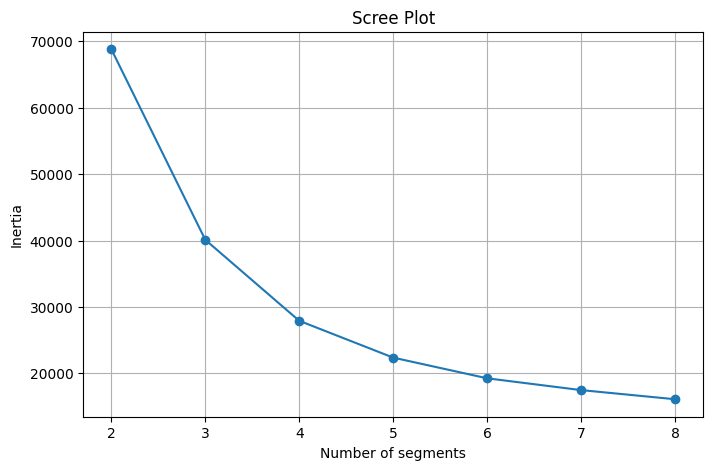

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set the random seed
np.random.seed(1234)

# Define the range of clusters
cluster_range = range(2, 9)
nrep = 10

# Store the inertia values for each number of clusters
inertia_values = []

for n_clusters in cluster_range:
    best_inertia = float('inf')
    for _ in range(nrep):
        kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=None)
        kmeans.fit(dfnan)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
    inertia_values.append(best_inertia)

# Create the scree plot
plt.figure(figsize=(8, 5))
plt.plot(list(cluster_range), inertia_values, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [239]:
nboot = 100

# Function to perform KMeans clustering
def perform_kmeans(dfnan, n_clusters, nrep):
    best_kmeans = None
    best_score = float('inf')
    for _ in range(nrep):
        kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=None)
        kmeans.fit(dfnan)
        if kmeans.inertia_ < best_score:
            best_score = kmeans.inertia_
            best_kmeans = kmeans
    return best_kmeans

# Perform bootstrapped clustering and calculate adjusted Rand index
ari_scores = {n_clusters: [] for n_clusters in cluster_range}

for n_clusters in cluster_range:
    for _ in range(nboot):
        # Resample the data with replacement
        resampled_data = resample(dfnan, random_state=None)
        # Perform clustering on resampled data
        kmeans = perform_kmeans(resampled_data, n_clusters, nrep)
        # Perform clustering on the original data
        original_kmeans = perform_kmeans(dfnan, n_clusters, nrep)
        # Calculate adjusted Rand index between original and resampled labels
        ari = adjusted_rand_score(original_kmeans.labels_, kmeans.labels_)
        ari_scores[n_clusters].append(ari)


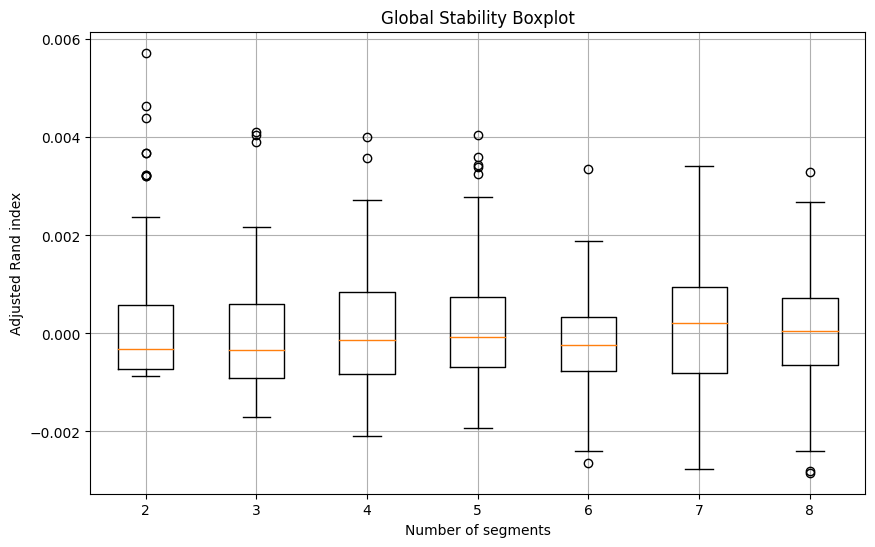

In [240]:
plt.figure(figsize=(10, 6))
plt.boxplot([ari_scores[n_clusters] for n_clusters in cluster_range], labels=list(cluster_range))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Global Stability Boxplot')
plt.grid(True)
plt.show()

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


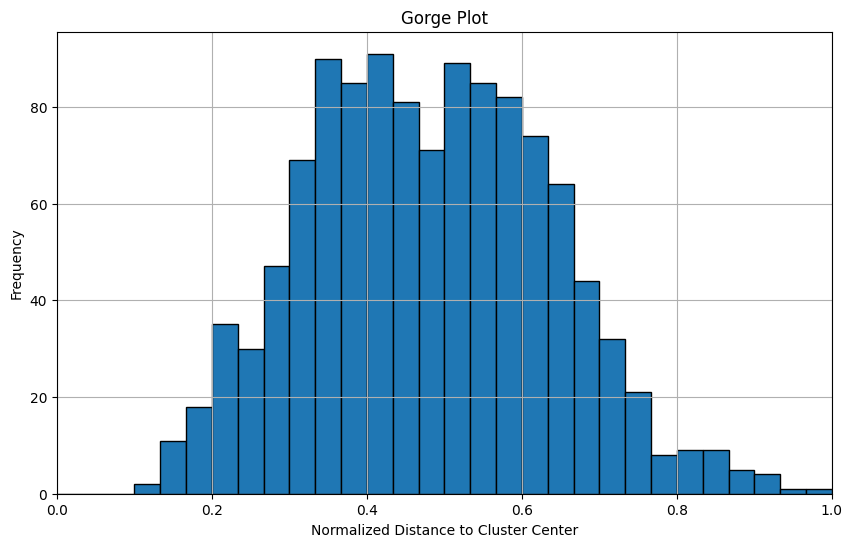

In [241]:
# Perform KMeans clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234)
kmeans_4.fit(dfnan)

# Calculate the distances to the cluster centers
distances = kmeans_4.transform(dfnan)
min_distances = np.min(distances, axis=1)

# Normalize distances to be within the range [0, 1]
normalized_distances = min_distances / np.max(min_distances)

# Create the histogram (gorge plot)
plt.figure(figsize=(10, 6))
plt.hist(normalized_distances, bins=30, range=(0, 1), edgecolor='black')
plt.xlabel('Normalized Distance to Cluster Center')
plt.ylabel('Frequency')
plt.title('Gorge Plot')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

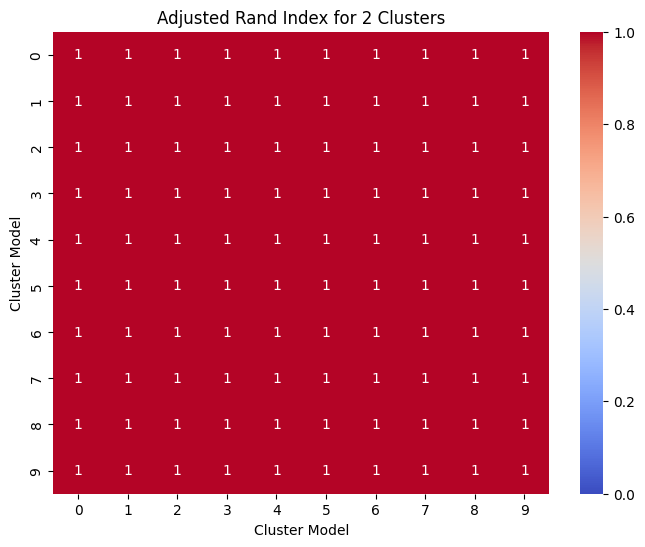

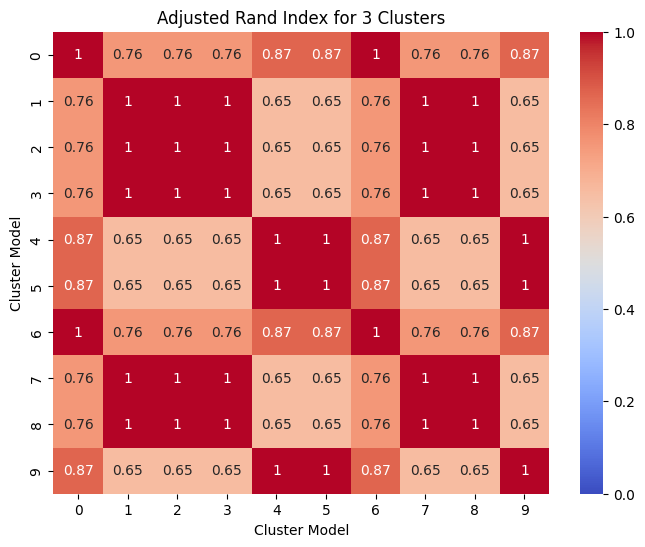

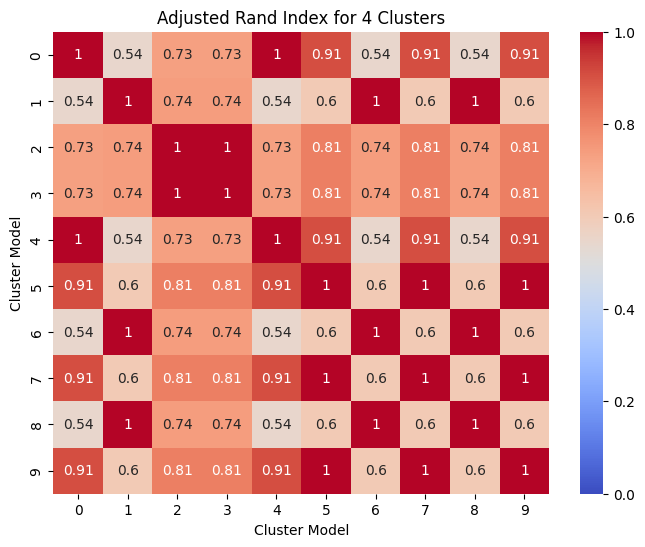

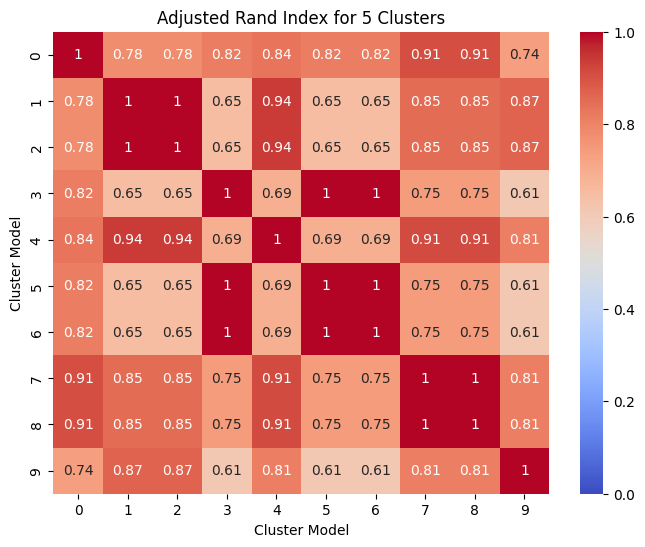

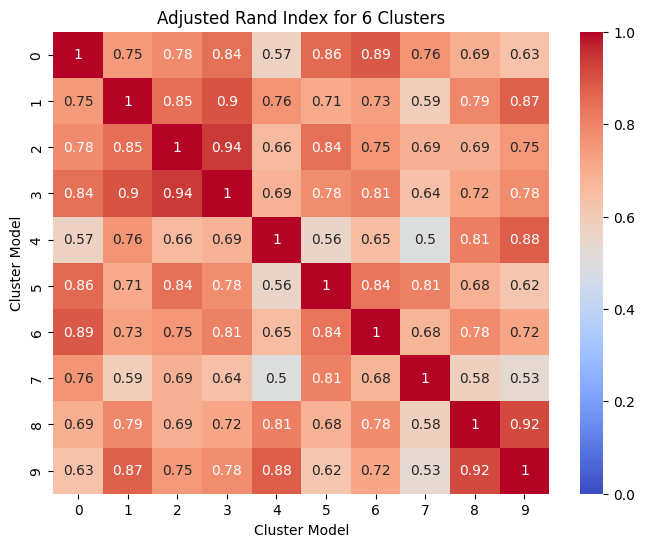

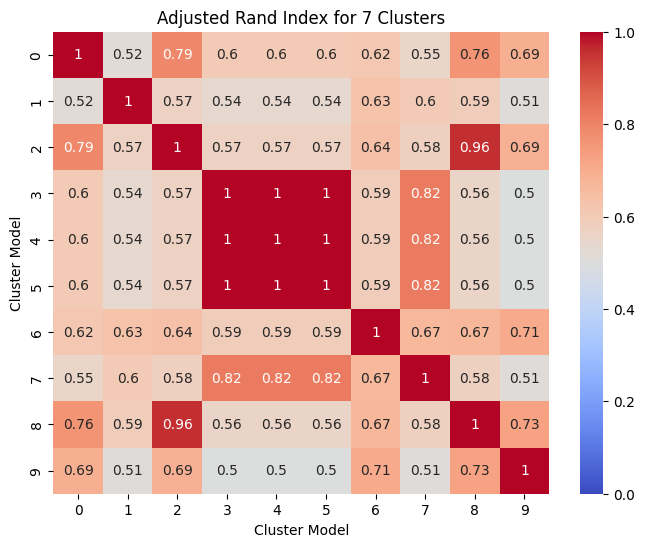

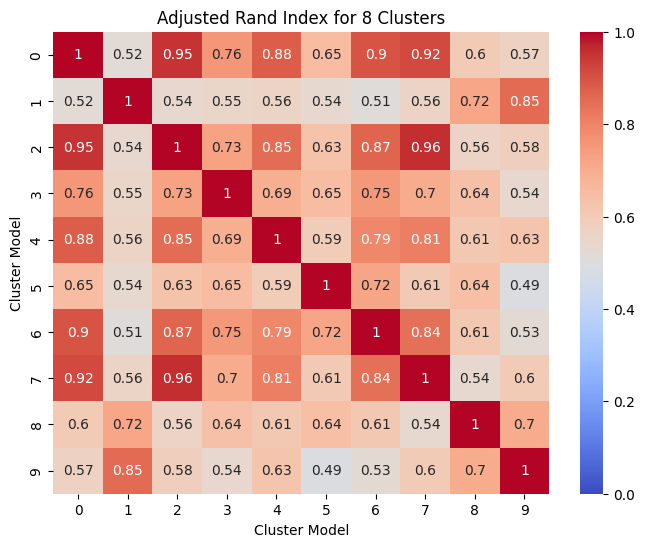

In [250]:

# Function to perform KMeans clustering
def perform_kmeans(dfnan, n_clusters, nrep):
    kmeans_models = []
    for _ in range(nrep):
        kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=None)
        kmeans.fit(dfnan)
        kmeans_models.append(kmeans)
    return kmeans_models

# Perform clustering for each number of clusters
all_kmeans_models = {}
for n_clusters in cluster_range:
    all_kmeans_models[n_clusters] = perform_kmeans(dfnan, n_clusters, nrep)


# Calculate adjusted Rand index between all pairs of clustering results
def calculate_ari_matrix(kmeans_models):
    n = len(kmeans_models)
    ari_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            ari = adjusted_rand_score(kmeans_models[i].labels_, kmeans_models[j].labels_)
            ari_matrix[i, j] = ari
            ari_matrix[j, i] = ari
    return ari_matrix

# Visualize the adjusted Rand index for each number of clusters
for n_clusters in cluster_range:
    ari_matrix = calculate_ari_matrix(all_kmeans_models[n_clusters])
    plt.figure(figsize=(8, 6))
    sns.heatmap(ari_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title(f'Adjusted Rand Index for {n_clusters} Clusters')
    plt.xlabel('Cluster Model')
    plt.ylabel('Cluster Model')
    plt.show()

Segment Level Stability Within Solutions (SLSW) scores for 4 clusters:
[0.970035345269879, 0.8501704916292534, 0.9087484000987072, 0.5818172380793757, 0.9087484000987072, 0.8347069425082881, 0.7574373765715207, 0.9087484000987072, 0.8097220064399491, 0.9257893069465591, 0.8592405672571031, 0.970035345269879, 0.9257893069465591, 0.9234627647117232, 0.796987515584139, 0.9257893069465591, 0.6515605354497314, 0.970035345269879, 0.9257893069465591, 0.8581431139924868, 0.9211439765790655, 0.8134215583122919, 0.9257893069465591, 0.5818172380793757, 0.8031291650701994, 0.5818172380793757, 0.6522673980411832, 0.9277937967752109, 0.8614201813582925, 0.9257893069465591, 0.8031291650701994, 0.5910842967173543, 0.9087484000987072, 0.9848679820218096, 0.8031291650701994, 0.9257893069465591, 0.8307872334597822, 0.7574373765715207, 0.970035345269879, 0.5606159922163874, 0.5818172380793757, 0.8115754852954863, 0.817215437949497, 0.7574373765715207, 0.965458496038103, 0.7591762472721796, 0.9257893069465

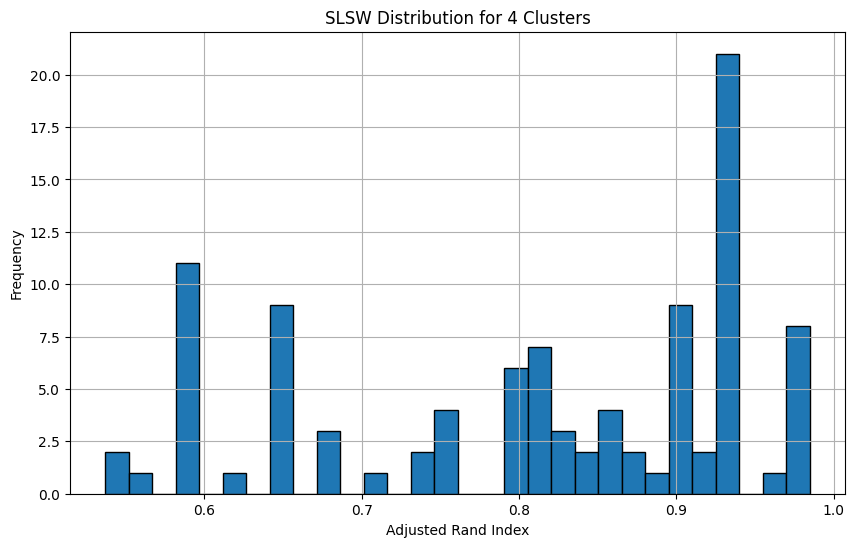

In [251]:

# Perform KMeans clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234, n_init='auto')
kmeans_4.fit(dfnan)
original_labels = kmeans_4.labels_

# Function to perform bootstrapped clustering and calculate ARI
def calculate_slsw(dfnan, original_labels, n_clusters, nboot):
    ari_scores = []
    for _ in range(nboot):
        # Resample the data with replacement
        resampled_data = resample(dfnan, random_state=None)
        # Perform clustering on resampled data
        kmeans_boot = KMeans(n_clusters=n_clusters, random_state=None, n_init='auto')
        kmeans_boot.fit(resampled_data)
        # Calculate ARI between original labels and bootstrapped labels
        ari = adjusted_rand_score(original_labels, kmeans_boot.predict(dfnan))
        ari_scores.append(ari)
    return ari_scores

# Calculate SLSW for 4 clusters
MD_r4 = calculate_slsw(dfnan, original_labels, 4, nboot)

# Print the SLSW scores
print("Segment Level Stability Within Solutions (SLSW) scores for 4 clusters:")
print(MD_r4)

# Plot the distribution of SLSW scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(MD_r4, bins=30, edgecolor='black')
plt.xlabel('Adjusted Rand Index')
plt.ylabel('Frequency')
plt.title('SLSW Distribution for 4 Clusters')
plt.grid(True)
plt.show()

In [255]:
k_range = range(2, 9)
nrep = 10  # Number of repetitions
best_gmm = None
lowest_bic = np.infty

# Fit Gaussian Mixture Models with different number of components
for k in k_range:
    for _ in range(nrep):
        gmm = GaussianMixture(n_components=k, random_state=np.random.randint(0, 10000))
        gmm.fit(dfnan)
        bic = gmm.bic(dfnan)
        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm

# Print the best model
print("Best model:", best_gmm)

Best model: GaussianMixture(n_components=3, random_state=1890)


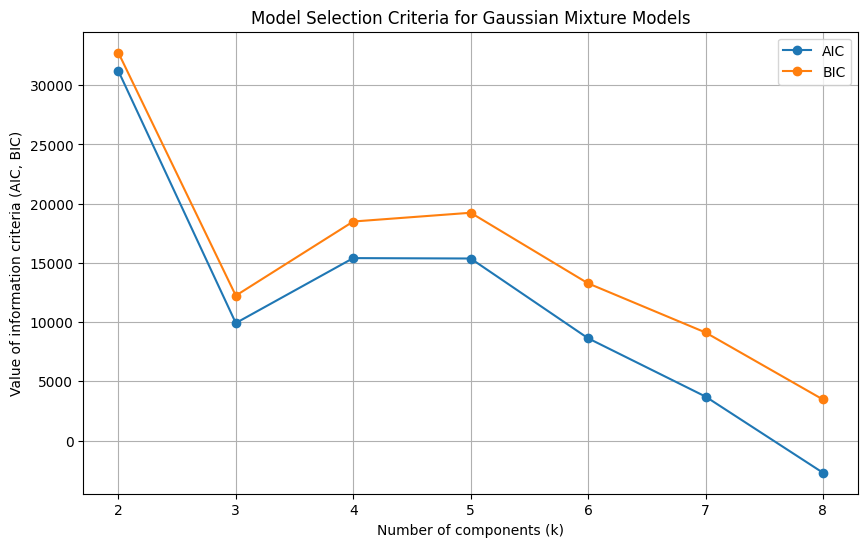

In [256]:
# Initialize dictionaries to store AIC, BIC, and ICL for each k
aic_values = {k: [] for k in k_range}
bic_values = {k: [] for k in k_range}

# Fit Gaussian Mixture Models with different number of components
for k in k_range:
    for _ in range(nrep):
        gmm = GaussianMixture(n_components=k, random_state=np.random.randint(0, 10000))
        gmm.fit(dfnan)
        aic_values[k].append(gmm.aic(dfnan))
        bic_values[k].append(gmm.bic(dfnan))

# Calculate mean AIC and BIC for each k
mean_aic = [np.mean(aic_values[k]) for k in k_range]
mean_bic = [np.mean(bic_values[k]) for k in k_range]

# Plot the values
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_aic, label='AIC', marker='o')
plt.plot(k_range, mean_bic, label='BIC', marker='o')

plt.xlabel('Number of components (k)')
plt.ylabel('Value of information criteria (AIC, BIC)')
plt.title('Model Selection Criteria for Gaussian Mixture Models')
plt.legend()
plt.grid(True)
plt.show()

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


mixture    0    1    2    3
kmeans                     
0          0  266    0    0
1          0    1   20  275
2          0   47  273    0
3        276    0    0    0


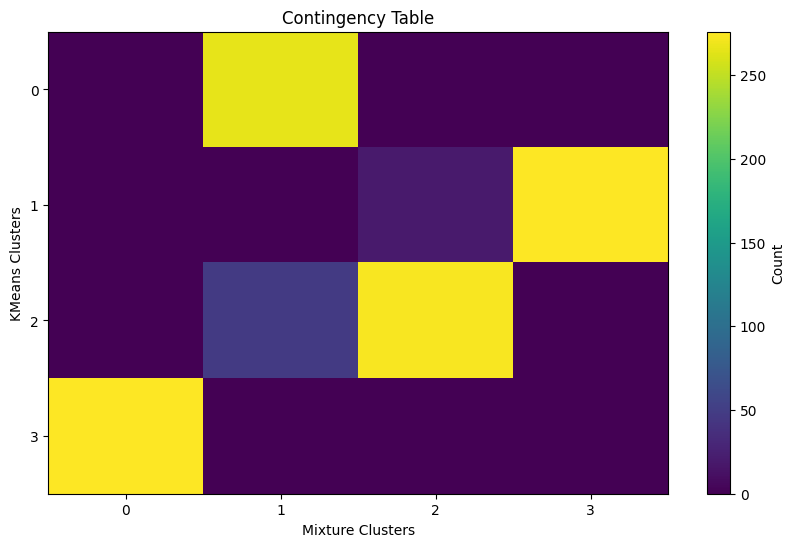

In [257]:
# Fit Gaussian Mixture Models with different number of components
gmm_models = {}
for k in k_range:
    best_gmm = None
    lowest_bic = np.infty
    for _ in range(nrep):
        gmm = GaussianMixture(n_components=k, random_state=np.random.randint(0, 10000))
        gmm.fit(dfnan)
        bic = gmm.bic(dfnan)
        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm
    gmm_models[k] = best_gmm

# Get the best model with 4 components
MD_m4 = gmm_models[4]

# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(dfnan)
kmeans_clusters = kmeans.labels_

# Get the clusters from the Gaussian Mixture Model
mixture_clusters = MD_m4.predict(dfnan)

# Create a contingency table
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters, rownames=['kmeans'], colnames=['mixture'])

# Print the contingency table
print(contingency_table)

# If you want to visualize the contingency table
plt.figure(figsize=(10, 6))
plt.title('Contingency Table')
plt.xlabel('Mixture Clusters')
plt.ylabel('KMeans Clusters')
plt.imshow(contingency_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(ticks=np.arange(4), labels=np.arange(4))
plt.yticks(ticks=np.arange(4), labels=np.arange(4))
plt.show()

In [258]:
# Compute the log-likelihood of the fitted model
log_likelihood = gmm.score(dfnan) * dfnan.shape[0]
print("Log-likelihood:", log_likelihood)

Log-likelihood: 3364.779308604867


In [259]:
# Get the count for each 'Like' rating
like_counts = dfnan['Like'].value_counts().sort_index()
print("Count for each 'Like' rating:")
print(like_counts)

# Create the formula string
feature_names = dfnan.columns[:11]  # Get the names of the first 11 columns
formula = "Like ~ " + " + ".join(feature_names)
print("Formula:", formula)

# Fit the model 
model = smf.ols(formula=formula, data=dfnan).fit()

# Print the summary of the model
print(model.summary())


Count for each 'Like' rating:
Like
-4.0     71
-3.0     73
-2.0     59
-1.0     58
 0.0    169
 1.0    152
 2.0    187
 3.0    229
 4.0    160
Name: count, dtype: int64
Formula: Like ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     97.50
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          7.95e-156
Time:                        06:53:14   Log-Likelihood:                -2252.1
No. Observations:                1158   AIC:                             4528.
Df Residuals:                    1146   BIC:                             4589.
Df Model:                          11                                        

In [262]:
# Fit a Gaussian Mixture Model with 2 components
features = dfnan.columns[1:11].tolist()
gmm = GaussianMixture(n_components=2,max_iter=68, n_init=10, random_state=1234)
dfnan['cluster'] = gmm.fit_predict(dfnan[features])

# Print cluster sizes
print("Cluster sizes:")
print(dfnan['cluster'].value_counts())

# Print convergence details (if applicable)
print("Convergence details:")
print(f"Convergence after {gmm.n_iter_} iterations")


Cluster sizes:
cluster
1    848
0    310
Name: count, dtype: int64
Convergence details:
Convergence after 7 iterations


/var/folders/jw/b828mxp17cg561jtj9ps_vr80000gn/T/ipykernel_67696/714324570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnan['cluster'] = gmm.fit_predict(dfnan[features])


/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


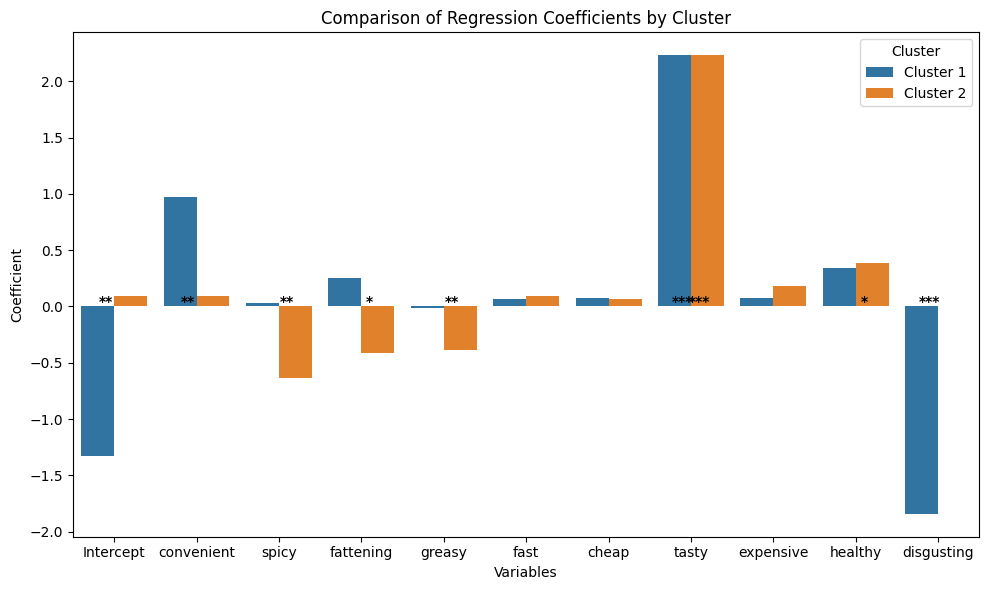

In [263]:

# Fit linear regression models for each cluster
results = []
for cluster in range(2):  # Assuming 2 components/clusters
    cluster_data = dfnan[dfnan['cluster'] == cluster]
    formula = "Like ~ " + " + ".join(features)
    model = smf.ols(formula=formula, data=cluster_data).fit()
    results.append(model)
    

# Plotting coefficients with significance shading
fig, ax = plt.subplots(figsize=(10, 6))

# Extract coefficient estimates and p-values
coef_df = pd.DataFrame()
for i, model in enumerate(results):
    cluster_name = f"Cluster {i+1}"
    coef_summary = model.summary2().tables[1]
    coef_summary['Cluster'] = cluster_name
    coef_df = pd.concat([coef_df, coef_summary])

# Reset index to use columns in plotting correctly
coef_df = coef_df.reset_index()

# Plotting
sns.barplot(x='index', y='Coef.', hue='Cluster', data=coef_df, ax=ax)

# Significance shading
for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
    coef_name = label.get_text()
    for cluster_idx, cluster in enumerate(results):
        p_val = cluster.pvalues[coef_name]
        if p_val < 0.001:
            ax.text(tick + cluster_idx * 0.2 - 0.1, 0, '***', horizontalalignment='center', color='black', weight='bold')
        elif p_val < 0.01:
            ax.text(tick + cluster_idx * 0.2 - 0.1, 0, '**', horizontalalignment='center', color='black', weight='bold')
        elif p_val < 0.05:
            ax.text(tick + cluster_idx * 0.2 - 0.1, 0, '*', horizontalalignment='center', color='black', weight='bold')

# Adjust plot aesthetics
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficient')
ax.set_title('Comparison of Regression Coefficients by Cluster')
ax.legend(title='Cluster')

plt.tight_layout()
plt.show()


/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/jw/b828mxp17cg561jtj9ps_vr80000gn/T/ipykernel_67696/1009625555.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=segment_profiles.melt(id_vars='Segment'), x='variable', y='value', hue='Segment', ci=None)


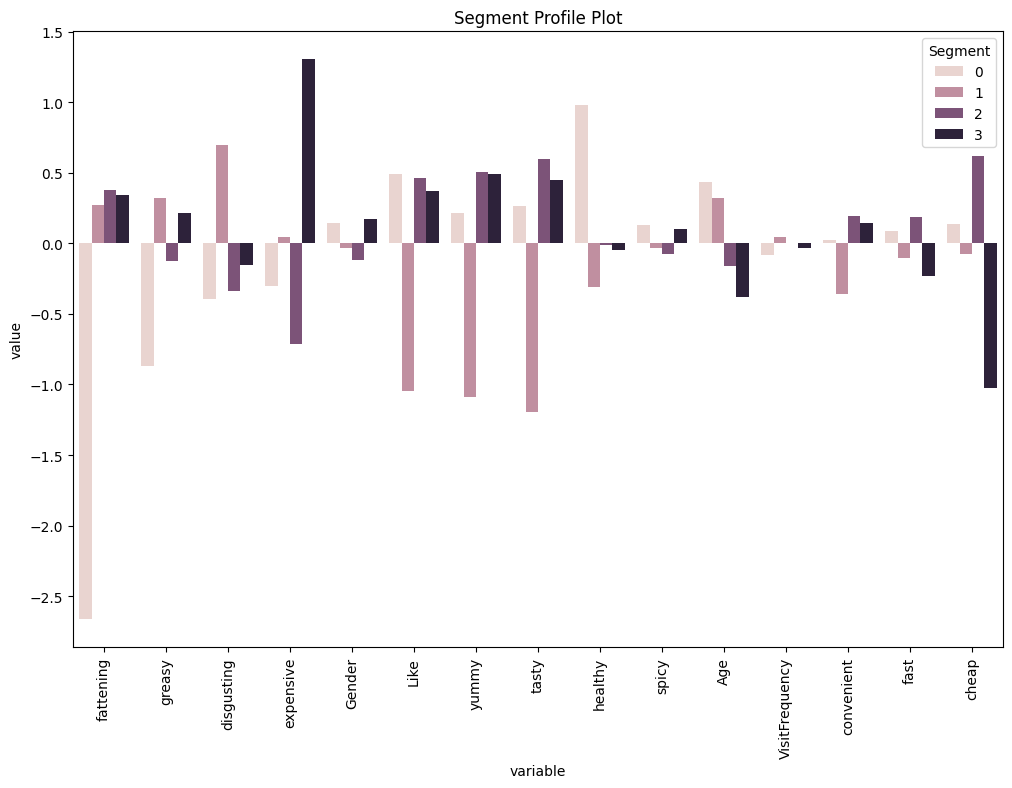

In [270]:

# Step 1: Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(dfnan)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
MD_k4 = kmeans.fit_predict(MD_x_scaled)

# Step 3: Calculate the hierarchical cluster analysis
MD_vclust = linkage(MD_x_scaled.T, method='ward')

# Step 4: Get the order of variables based on hierarchical clustering
ordered_vars = leaves_list(MD_vclust)

# Step 5: Create a segment profile plot
segment_profiles = pd.DataFrame(MD_x_scaled, columns=dfnan.columns)
segment_profiles['Segment'] = MD_k4

# Reorder the columns based on hierarchical clustering
ordered_columns = segment_profiles.columns[ordered_vars].tolist() + ['Segment']
segment_profiles = segment_profiles[ordered_columns]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=segment_profiles.melt(id_vars='Segment'), x='variable', y='value', hue='Segment', ci=None)
plt.xticks(rotation=90)
plt.title('Segment Profile Plot')
plt.show()


/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


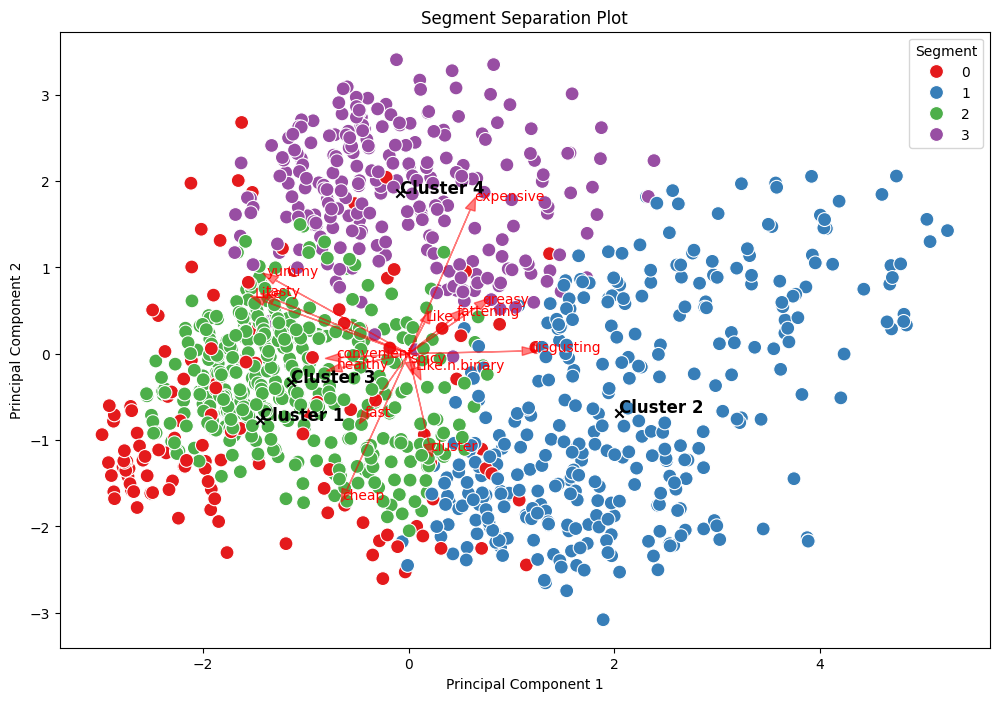

In [272]:
#Step 1: Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(dfnan)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
MD_k4 = kmeans.fit_predict(MD_x_scaled)

# Step 3: Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Create a DataFrame with PCA results and cluster assignments
pca_df = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
pca_df['Segment'] = MD_k4

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='Set1', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot')
plt.legend(title='Segment')

# Add cluster numbers at the centroids
centroids = pca.transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    plt.scatter(*centroid, color='black', marker='x')
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', fontsize=12, fontweight='bold')

# Add arrows for PCA components
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1 * 3, comp2 * 3, color='red', alpha=0.5, head_width=0.1)
    plt.text(comp1 * 3.2, comp2 * 3.2, MD_x.columns[i], color='red')

plt.show()

A.7 Step 7: Describing Segments

In [273]:
# Load the data
df = pd.read_csv('/Users/rajdipingale/Downloads/mcdonalds.csv')

# Convert the 'Like' column to numeric values
like_mapping = {
    "I hate it!": -5, "-4": -4, "-3": -3, "-2": -2,
    "-1": -1, "0": 0, "+1": 1, "+2": 2,
    "+3": 3, "+4": 4, "I love it!": 5
}
df['Like'] = df['Like'].map(like_mapping)

# Convert categorical columns to numeric values using LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
dfnan=df.dropna()

<Figure size 1200x800 with 0 Axes>

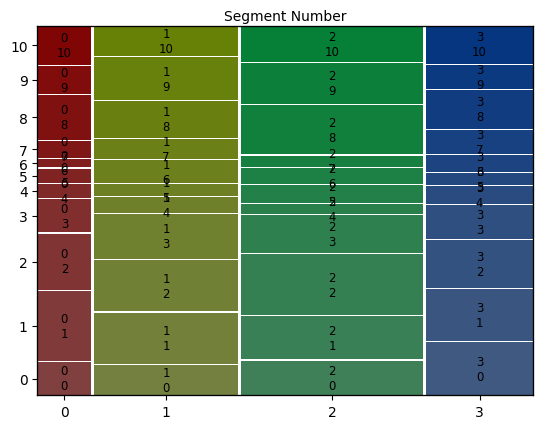

In [274]:
# Create a DataFrame with segment membership
segment_membership = pd.Series(MD_k4, name='Segment')

# Step 3: Cross-tabulate segment membership and the love-hate variable
crosstab = pd.crosstab(segment_membership, df3['Like'])

# Step 4: Generate the mosaic plot
plt.figure(figsize=(12, 8))
mosaic(crosstab.stack())
plt.xlabel('Segment Number')
plt.title('')
plt.show()

In [230]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,3,1


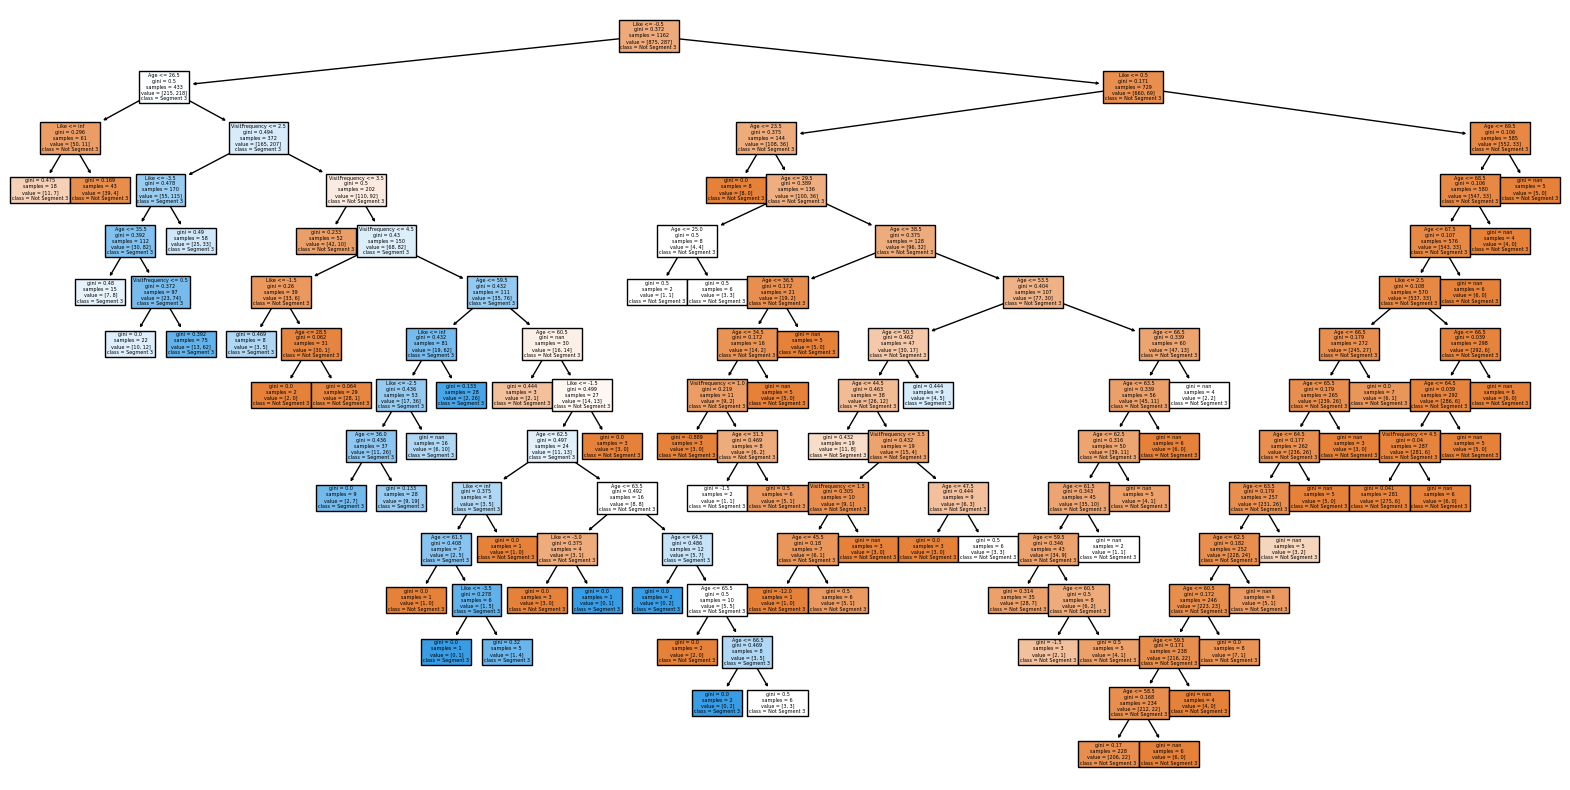

In [233]:

# Assume cluster memberships are provided 
np.random.seed(0)
df['k4'] = MD_k4

# Convert Gender to numerical
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Define the dependent variable (segment 3 membership) and independent variables
df['segment_3'] = (df['k4'] == 3).astype(int)
X = df[['Like', 'Age','VisitFrequency', 'Gender']]
y = df['segment_3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.show()


0    2.437500
1    2.669591
2    2.586605
3    2.525490
Name: VisitFrequency, dtype: float64
0    2.164062
1   -1.453216
2    2.108545
3    1.886275
Name: Like, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
Name: GenderNumeric, dtype: float64


/var/folders/jw/b828mxp17cg561jtj9ps_vr80000gn/T/ipykernel_67696/2176015522.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnan['GenderNumeric'] = (dfnan['Gender'] == '0').astype(int)


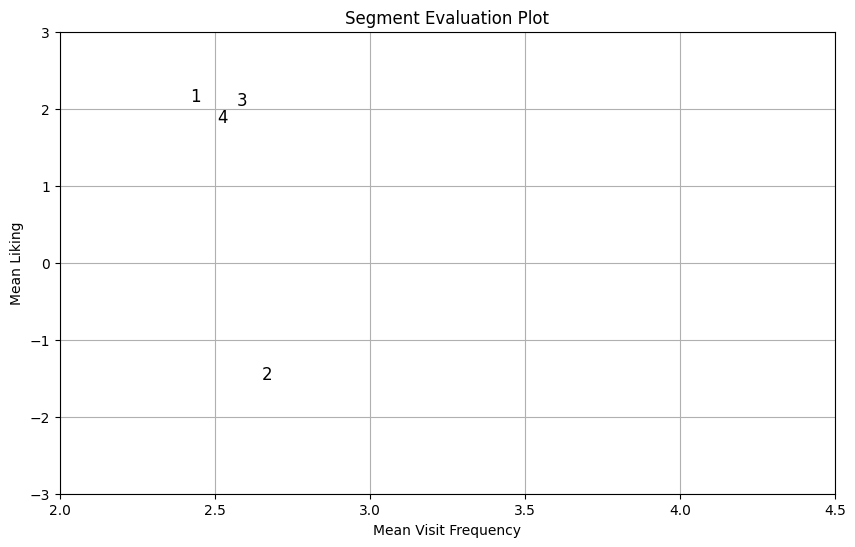

In [285]:
# Segment membership (k4) needs to be defined
k4 = MD_k4 

# Compute mean values for VisitFrequency
visit = dfnan.groupby(k4)['VisitFrequency'].mean()
print(visit)

# Compute mean values for Like.n
like = dfnan.groupby(k4)['Like'].mean()
print(like)

# Convert Gender to numeric and compute mean values
dfnan['GenderNumeric'] = (dfnan['Gender'] == '0').astype(int)
female = dfnan.groupby(k4)['GenderNumeric'].mean()
print(female)

# Plot the segment evaluation plot
plt.figure(figsize=(10, 6))
plt.scatter(visit, like, s=10 * female * 100, alpha=0.5)  # s is the size of the bubbles
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Annotate points with segment numbers
for i, (x, y) in enumerate(zip(visit, like)):
    plt.text(x, y, str(i+1), fontsize=12, ha='center', va='center')

plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Liking')
plt.title('Segment Evaluation Plot')
plt.grid(True)
plt.show()